# De-Identifying Public Personnel Data

## Install Libraries

In [243]:
# Install required libraries
#pip install Selenium
#pip install chromedriver-autoinstaller

## Libraries

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

# Downloads input data from a Website
from selenium import webdriver
import chromedriver_autoinstaller
import time
import pathlib

import pandas as pd
import numpy as np
import missingno as msno

# Pandas libraries for SQL package
from pandasql import sqldf
import pandasql as psql

#ML Modeling Packages
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Packages for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Download Raw Data from OPM using Selenium

In [245]:
#Autoinstall Chrome Driver
chromedriver_autoinstaller.install()  # Check if the current version of chromedriver exists
                                      # and if it doesn't exist, download it automatically,
                                      # then add chromedriver to path
        
# Preference to choose the file Download Directory

options = webdriver.ChromeOptions();

prefs = {"download.default_directory" : os.getcwd()};

options.add_experimental_option("prefs",prefs);

# Launching Chrome Browser and OPM website
driver = webdriver.Chrome(chrome_options=options)
driver.get("https://www.opm.gov/data/index.aspx")
print(driver.title)


# Finding Zipfile by xpath and downloading

June21Zip = driver.find_element_by_xpath('(//*[@id="ctl01_ctl00_MainContentDiv"]/table[2]/tbody/tr[2]/td[3]/span/a/img)[1]').click()
print("June Zipfile downloaded")
time.sleep(20)
Sepe21Zip = driver.find_element_by_xpath('(/html/body/form/div[4]/div/div[3]/table[2]/tbody/tr[3]/td[3]/span/a/img)').click()
print("September Zipfile downloaded")

Data, Analysis & Documentation : Raw Datasets - OPM.gov
June Zipfile downloaded
September Zipfile downloaded


## Raw Data Import

In [2]:
# Import September data
input_sep = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/FACTDATA_SEP2021.txt")
print(input_sep.head(3))
# Import June data
input_june = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/JuneData/FACTDATA_JUN2021.txt")
print(input_june.head(2))



  AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL   OCC  PATCO  PP  PPGRD SALLVL  \
0   AA00  11      F    13    NaN      F  0340      2  ES  ES-**      S   
1   AA00  11      I    15    NaN      H  0905      1  ES  ES-**      R   
2   AA00  11      E    15     15      E  0905      1  99  GS-15      Q   

  STEMOCC SUPERVIS TOA WORKSCH  WORKSTAT  DATECODE  EMPLOYMENT    SALARY   LOS  
0    XXXX        2  50       F         1    202109           1  192500.0  18.3  
1    XXXX        2  50       F         1    202109           1  187000.0  28.7  
2    XXXX        2  30       F         1    202109           1  172500.0  12.0  
  AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL  OCC  PATCO  PP  PPGRD SALLVL STEMOCC  \
0   AA00  11      F    13    NaN      F  340      2  ES  ES-**      R    XXXX   
1   AA00  11      I    15    NaN      H  905      1  ES  ES-**      R    XXXX   

  SUPERVIS TOA WORKSCH  WORKSTAT  DATECODE  EMPLOYMENT    SALARY   LOS  
0        2  50       F         1    202106           1  181500

### Import Translation Data files

In [3]:
# Translations Data Import
agencyt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTagy.txt")
locationt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTloc.txt")
aget = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTagelvl.txt")
educationt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTedlvl.txt")
gsegrdt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTgsegrd.txt")
loslvlt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTloslvl.txt")
occupationt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTocc.txt")
patcot = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTpatco.txt")
payplant = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTppgrd.txt")
sallvlt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTsallvl.txt")
stemocct = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTstemocc.txt")
supert = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTsuper.txt")
toat = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTtoa.txt")
wrkscht = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTwrksch.txt")
wkstatt = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTwkstat.txt")
datet = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/DTdate.txt")


### Merge data from June and September

In [4]:
#merge FACTDATA of both Sep and June
input_data = pd.concat([input_sep, input_june], axis=0)
input_data.head(3)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,0340,2,ES,ES-**,S,XXXX,2,50,F,1,202109,1,192500.0,18.3
1,AA00,11,I,15,NaN,H,0905,1,ES,ES-**,R,XXXX,2,50,F,1,202109,1,187000.0,28.7
2,AA00,11,E,15,15,E,0905,1,99,GS-15,Q,XXXX,2,30,F,1,202109,1,172500.0,12.0


## Exploratory Data Analysis

In [249]:
# Get a concise summary of the input data.
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4379934 entries, 0 to 2188922
Data columns (total 20 columns):
AGYSUB        object
LOC           object
AGELVL        object
EDLVL         object
GSEGRD        object
LOSLVL        object
OCC           object
PATCO         int64
PP            object
PPGRD         object
SALLVL        object
STEMOCC       object
SUPERVIS      object
TOA           object
WORKSCH       object
WORKSTAT      int64
DATECODE      int64
EMPLOYMENT    int64
SALARY        float64
LOS           float64
dtypes: float64(2), int64(4), object(14)
memory usage: 701.7+ MB


In [250]:
# Statistical details of Numeric Variables
input_data.describe()

,PATCO,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
count,4.379934e+06,4.379934e+06,4.379934e+06,4379934.0,3.791477e+06,4.379897e+06
mean,2.458735e+00,1.108613e+00,2.021075e+05,1.0,9.203426e+04,1.217102e+01
std,1.484695e+00,3.111534e-01,1.500000e+00,0.0,4.548499e+04,1.007234e+01
min,1.000000e+00,1.000000e+00,2.021060e+05,1.0,1.500000e+04,0.000000e+00
25%,1.000000e+00,1.000000e+00,2.021060e+05,1.0,5.831000e+04,3.700000e+00
50%,2.000000e+00,1.000000e+00,2.021090e+05,1.0,8.404900e+04,1.060000e+01
75%,3.000000e+00,1.000000e+00,2.021090e+05,1.0,1.152160e+05,1.780000e+01
max,9.000000e+00,2.000000e+00,2.021090e+05,1.0,4.654110e+05,7.710000e+01


In [251]:
# Statistical details of All Variables
input_data.describe(include='all')

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
count,4379934,4379934,4379934,4370453,3098064.0,4379934,4379934,4.379934e+06,4379934,4379934,4379934,4379934,4379934.0,4379934.0,4379934,4.379934e+06,4.379934e+06,4379934.0,3.791477e+06,4.379897e+06
unique,541,222,12,45,31.0,11,1238,NaN,6,1037,26,117,13.0,37.0,10,NaN,NaN,NaN,NaN,NaN
top,VATA,US,H,13,12.0,E,0610,NaN,99,GS-12,E,XXXX,8.0,10.0,F,NaN,NaN,NaN,NaN,NaN
freq,767289,568272,624230,887541,460885.0,864333,167519,NaN,4194395,590339,460632,3251774,2173609.0,1916221.0,4134439,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.458735e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.108613e+00,2.021075e+05,1.0,9.203426e+04,1.217102e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.484695e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.111534e-01,1.500000e+00,0.0,4.548499e+04,1.007234e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.021060e+05,1.0,1.500000e+04,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.021060e+05,1.0,5.831000e+04,3.700000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.021090e+05,1.0,8.404900e+04,1.060000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.021090e+05,1.0,1.152160e+05,1.780000e+01


### Correlation Matrix of input_data

In [252]:
corrMatrix = input_data.corr()
corrMatrix

,PATCO,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
PATCO,1.000000,0.066460,-0.006041,NaN,-0.484898,-0.118325
WORKSTAT,0.066460,1.000000,-0.005138,NaN,-0.123223,-0.212658
DATECODE,-0.006041,-0.005138,1.000000,NaN,0.004370,0.000506
EMPLOYMENT,NaN,NaN,NaN,NaN,NaN,NaN
SALARY,-0.484898,-0.123223,0.004370,NaN,1.000000,0.321516
LOS,-0.118325,-0.212658,0.000506,NaN,0.321516,1.000000


(5.0, 0.0)

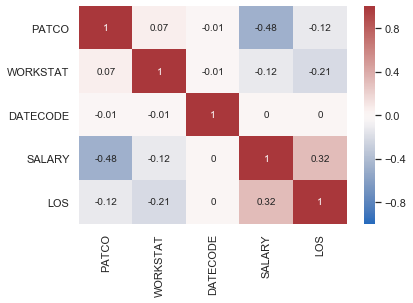

In [253]:
#Dropping Employment column for correlation plot
corrData = input_data
corrData = corrData.drop('EMPLOYMENT', 1)

# Correlation Plot
matrix = corrData.corr().round(2)
ax = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Numerical Data Distribution

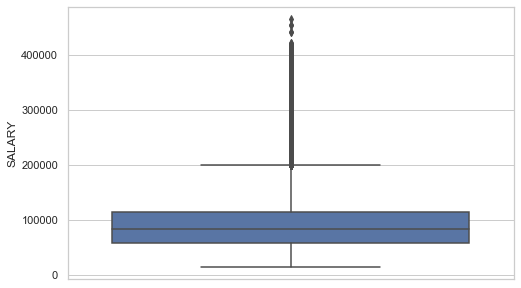

In [6]:
# Boxplot for Salary 
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='SALARY', data=input_data, orient="v")

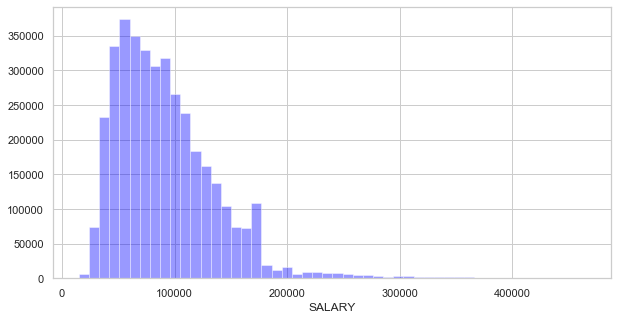

In [8]:
# Histogram for Salary
filter_data = input_data.dropna(subset=['SALARY'])
plt.figure(figsize=(10,5))
sns.distplot(filter_data['SALARY'], kde=False, color='blue')

### Categorical Data Distribution

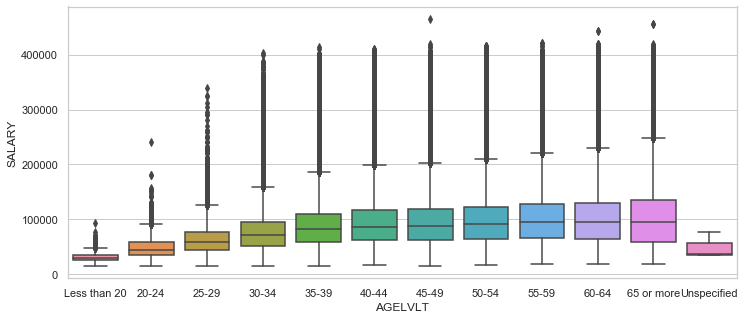

In [10]:
# Merging AGELVL translation data to input_data to get axes names
input_aget = pd.merge(input_data, aget, how='left', on=['AGELVL'],
left_index=False, right_index=False, sort=True)

#Boxplot for Agelevel vs Salary
plt.figure(figsize=(12,5))
ax = sns.boxplot(x='AGELVLT', y='SALARY', data=input_aget, orient="v")

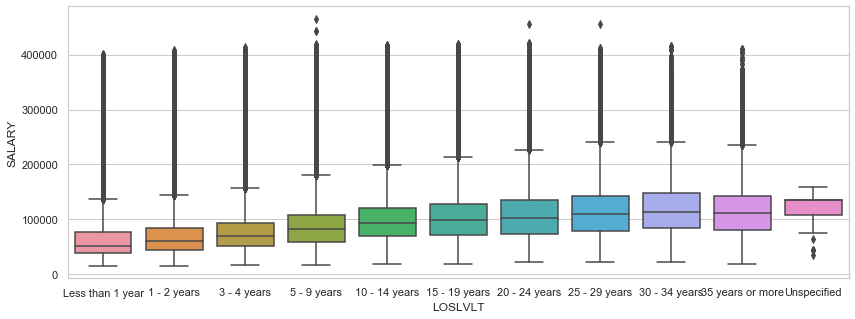

In [12]:
# Merging LOSLVL translation data to input_data to get axes names
input_loslvlt = pd.merge(input_data, loslvlt, how='left', on=['LOSLVL'],
left_index=False, right_index=False, sort=True)

# Boxplot for Length of Service level vs Salary
plt.figure(figsize=(14,5))
ax = sns.boxplot(x='LOSLVLT', y='SALARY', data=input_loslvlt, orient="v")

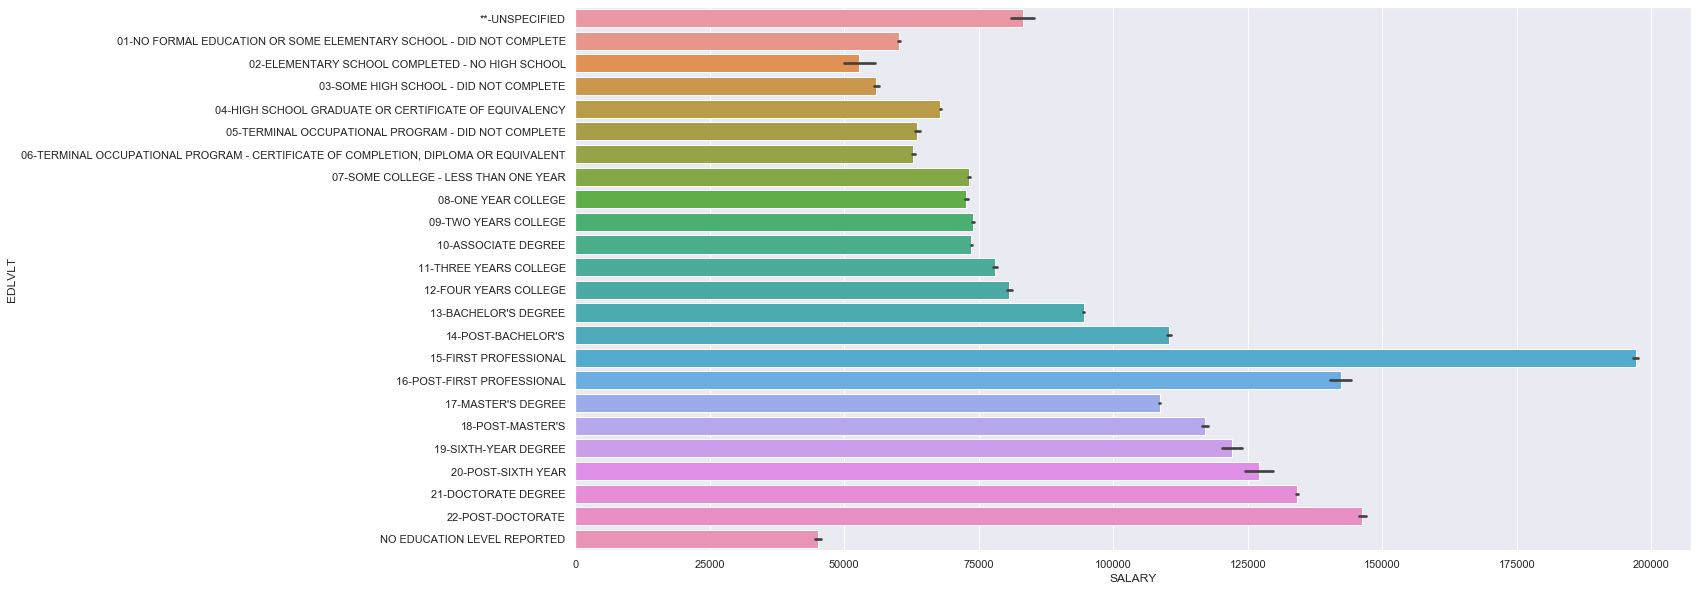

In [258]:
# Merging LOSLVL translation data to input_data to get axes names
input_educationt = pd.merge(input_data, educationt, how='left', on=['EDLVL'],
left_index=False, right_index=False, sort=True)

# Bar chart for Education Level vs Salary
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.barplot(y='EDLVLT',x='SALARY', data=input_educationt)

## Data Cleaning

### Missing Values

In [259]:
# Find Missing Values
null_sum = input_data.isnull().sum()

# Percentage of Missing Values
null_percent = input_data.isnull().sum()/(len(input_data))*100

# Printing Sum and Percentage in a single table. 
pd.concat([null_sum, null_percent], axis=1)  # 0 - Sum & 1 - Percentage

,0,1
AGYSUB,0,0.000000
LOC,0,0.000000
AGELVL,0,0.000000
EDLVL,9481,0.216464
GSEGRD,1281870,29.266879
LOSLVL,0,0.000000
OCC,0,0.000000
PATCO,0,0.000000
PP,0,0.000000
PPGRD,0,0.000000


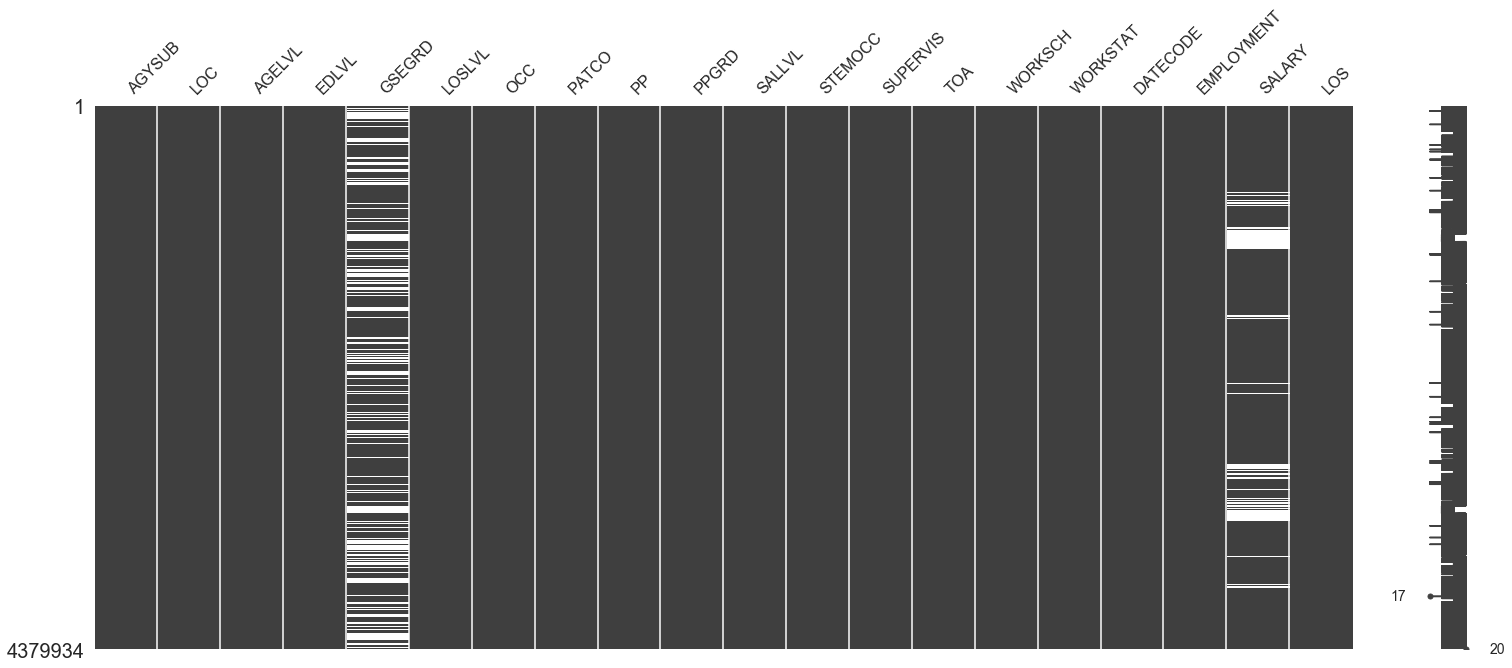

In [260]:
#Distribution of missing data
msno.matrix(input_data)

### Find null values by agency group

In [5]:
# Find null values grouped by agency
cols = input_data.columns
# creating a new column with sum of null values in each row
nullData = input_data.groupby(['AGYSUB'])[cols].apply(lambda x: x.isnull().sum())
nullData['results'] = nullData.sum(axis = 1)
nullData.head(2)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,results
AGYSUB,,,,,,,,,,,,,,,,,,,,,
AA00,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
AB00,0,0,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## Removing Missing Values

### List of Agencies with zero null values

In [6]:
# Finding agencies that has zero missing values
# Filtered data into dzero where there is no null values row wise
dzero = nullData[nullData['results'] == 0]
dzero.iloc[: , 1:-1] #trim first and last columns of the dataframe 1=AGYSUB, -1=results

# Fetching only the agencies with zero null values
zero_NA_agy = dzero.iloc[:,0]
noNull_agy = zero_NA_agy.keys().tolist()
#less_na_agy

# verifying the zero null agencies with main data agencies and printing all columns
clean_data = input_data[input_data['AGYSUB'].isin(noNull_agy)]
clean_data.head(2)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
38686,AF0U,24,K,08,13,D,2210,2,99,GG-13,L,2210,8,38,F,1,202109,1,127885.0,8.4
134010,AF1Q,40,J,10,13,G,1670,2,99,GS-13,K,XXXX,8,10,F,1,202109,1,116715.0,20.4


### Summary of data after removing NULL values

In [263]:
# Summary Statistics
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 38686 to 1779182
Data columns (total 20 columns):
AGYSUB        8827 non-null object
LOC           8827 non-null object
AGELVL        8827 non-null object
EDLVL         8827 non-null object
GSEGRD        8827 non-null object
LOSLVL        8827 non-null object
OCC           8827 non-null object
PATCO         8827 non-null int64
PP            8827 non-null object
PPGRD         8827 non-null object
SALLVL        8827 non-null object
STEMOCC       8827 non-null object
SUPERVIS      8827 non-null object
TOA           8827 non-null object
WORKSCH       8827 non-null object
WORKSTAT      8827 non-null int64
DATECODE      8827 non-null int64
EMPLOYMENT    8827 non-null int64
SALARY        8827 non-null float64
LOS           8827 non-null float64
dtypes: float64(2), int64(4), object(14)
memory usage: 1.4+ MB


## Agencies in Ascending Order

In [264]:
# No. of records in each agency in ascending order
clean_data['AGYSUB'].value_counts(ascending=True).reset_index(name='Count')

,index,Count
0,HE31,2
1,AF0U,2
2,HUXX,6
3,HUKA,10
4,VAGE,14
5,HW00,24
6,EDET,30
7,HUUU,33
8,VA**,36
9,VABD,37


## Re-identification Analysis

### Comparing both Dataframes

In [265]:
#Verify if data from both timeframes has same amount of rows
clean_data.groupby(['DATECODE']).count()

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,EMPLOYMENT,SALARY,LOS
DATECODE,,,,,,,,,,,,,,,,,,,
202106,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294
202109,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533


In [7]:
#Splitting the cleaned data into Sep and June for further analysis
# null_data_agy_J is June data and null_data_agy_S is September data
clean_data_J, clean_data_S  = [x for _, x in clean_data.groupby(clean_data['DATECODE'])]
#data_na_agy_J.head()
#data_na_agy_S.head()

In [8]:
#adding data to sqldf's
juneDf = psql.sqldf("select * from clean_data_J where DATECODE = 202106")
septDf = psql.sqldf("select * from clean_data_S where DATECODE = 202109")

## Important Findinds in data

### Matching Employees

In [9]:
#Matching Employees from both June and September
# Employees are matched based on LOS. If an employee in June continued to work in Sept then 
# his/her Length of Service increases by 0.3
identical = psql.sqldf("""select 
                    j.[AGYSUB], j.[SALLVL], j.[LOSLVL], j.[DATECODE], j.[SALARY], j.[LOS], 
                    s.[AGYSUB], s.[SALLVL], s.[LOSLVL], s.[DATECODE], s.[SALARY], s.[LOS] 
                    from  
                       juneDf j inner join septDf s 
                       on j.LOS+0.3 = s.LOS and 
                       j.SALARY <= s.SALARY and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA; """)

identical.head() # Printed only few columns to compare

,AGYSUB,SALLVL,LOSLVL,DATECODE,SALARY,LOS,AGYSUB,SALLVL,LOSLVL,DATECODE,SALARY,LOS
0,AF1Q,I,F,202106,98155.0,17.3,AF1Q,I,F,202109,98155.0,17.6
1,AF1Q,K,I,202106,119787.0,32.0,AF1Q,K,I,202109,119787.0,32.3
2,AF1Q,K,G,202106,119787.0,20.4,AF1Q,K,G,202109,119787.0,20.7
3,AF1Q,K,H,202106,119787.0,26.0,AF1Q,K,H,202109,119787.0,26.3
4,AF1Q,H,E,202106,82655.0,14.5,AF1Q,H,E,202109,82655.0,14.8


In [10]:
#Matching Employees from both June and September
# Employees are matched based on LOS. If an employee in June continued to work in Sept then 
# his/her Length of Service increases by 0.3
identicalAllcols = psql.sqldf("""select 
                    j.*, 
                    s.* 
                    from  
                       juneDf j inner join septDf s 
                       on j.LOS+0.3 = s.LOS and 
                       j.SALARY <= s.SALARY and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA; """)

identicalAllcols.head(2) # Printed all columns for regression analysis
#identicalAllcols.to_csv('identicalAll.csv')

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AF1Q,40,J,04,12.0,F,1670,2,99,GS-12,...,I,XXXX,8,10,F,1,202109,1,98155.0,17.6
1,AF1Q,40,I,13,13.0,I,1361,2,99,GS-13,...,K,1361,8,10,F,1,202109,1,119787.0,32.3


#### Employees who received a Salary Hike in September

In [22]:
#Employees with Salary Hike
salaryHike = psql.sqldf("""select 
                    j.[AGYSUB], j.[SALLVL], j.[LOSLVL], j.[DATECODE], j.[SALARY], j.[LOS], 
                    s.[AGYSUB], s.[SALLVL], s.[LOSLVL], s.[DATECODE], s.[SALARY], s.[LOS] 
                    from  
                       juneDf j inner join septDf s 
                       on j.LOS+0.3 = s.LOS and 
                       j.SALARY < s.SALARY and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA ; """)

salaryHike.head(2)

,AGYSUB,SALLVL,LOSLVL,DATECODE,SALARY,LOS,AGYSUB,SALLVL,LOSLVL,DATECODE,SALARY,LOS
0,AF1Q,N,H,202106,140859.0,27.0,AF1Q,N,H,202109,144771.0,27.3
1,AF1Q,I,D,202106,98286.0,6.8,AF1Q,J,D,202109,101358.0,7.1


#### Binary column for Salary Hike

In [11]:
# Adding binary column for Salary Hike 
# 1 = Hike and 0 = same salary
salaryHikebin = psql.sqldf("""select 
                    j.[AGYSUB], j.[SALLVL], j.[LOSLVL], j.[DATECODE], j.[SALARY] as jsal, j.[LOS], 
                    s.[AGYSUB], s.[SALLVL], s.[LOSLVL], s.[DATECODE], s.[SALARY] as ssal, s.[LOS],
                    case when s.[SALARY] > j.[SALARY] then 1 else 0 end as hike
                    from  
                       juneDf j inner join septDf s 
                       on j.LOS+0.3 = s.LOS and 
                       j.SALARY <= s.SALARY and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA ; """)


salaryHikebin
#salaryHikebin.to_csv("hike_bin.csv")

,AGYSUB,SALLVL,LOSLVL,DATECODE,jsal,LOS,AGYSUB,SALLVL,LOSLVL,DATECODE,ssal,LOS,hike
0,AF1Q,I,F,202106,98155.0,17.3,AF1Q,I,F,202109,98155.0,17.6,0
1,AF1Q,K,I,202106,119787.0,32.0,AF1Q,K,I,202109,119787.0,32.3,0
2,AF1Q,K,G,202106,119787.0,20.4,AF1Q,K,G,202109,119787.0,20.7,0
3,AF1Q,K,H,202106,119787.0,26.0,AF1Q,K,H,202109,119787.0,26.3,0
4,AF1Q,H,E,202106,82655.0,14.5,AF1Q,H,E,202109,82655.0,14.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,VAKB,Q,I,202106,172500.0,30.0,VAKB,Q,I,202109,172500.0,30.3,0
1433,VAKB,N,G,202106,148932.0,20.9,VAKB,N,G,202109,148932.0,21.2,0
1434,VAKB,L,D,202106,126614.0,9.0,VAKB,M,D,202109,130698.0,9.3,1
1435,VAKB,H,E,202106,87198.0,11.5,VAKB,J,E,202109,103690.0,11.8,1


#### Employees who did not receive a Salary Hike in September

In [23]:
#Employees with no hike and with 0.3 LOS
noHike = psql.sqldf("""select 
                    j.[AGYSUB], j.[SALLVL], j.[LOSLVL], j.[DATECODE], j.[SALARY], j.[LOS], 
                    s.[AGYSUB], s.[SALLVL], s.[LOSLVL], s.[DATECODE], s.[SALARY], s.[LOS] 
                    from  
                       juneDf j inner join septDf s 
                       on j.LOS+0.3 = s.LOS and 
                       j.SALARY = s.SALARY and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA ; """)

noHike.head(2)

,AGYSUB,SALLVL,LOSLVL,DATECODE,SALARY,LOS,AGYSUB,SALLVL,LOSLVL,DATECODE,SALARY,LOS
0,AF1Q,I,F,202106,98155.0,17.3,AF1Q,I,F,202109,98155.0,17.6
1,AF1Q,K,I,202106,119787.0,32.0,AF1Q,K,I,202109,119787.0,32.3


##### Percentage of employees who received a Hike

In [24]:
#Percentage of employees who received a Hike
Hike_Salary_Percentage = (len(salaryHike.index)/len(identicalAllcols.index))*100
round(Hike_Salary_Percentage,3)

22.408

##### Percentage of employees who did not receive a Hike

In [25]:
#Percentage of employees who did not receive a Hike
nohike_Salary_Percentage = (len(noHike.index)/len(identicalAllcols.index))*100
round(nohike_Salary_Percentage,3)

77.592

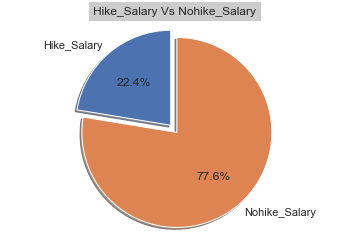

In [26]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Hike_Salary", "Nohike_Salary"]
sizes = np.array([Hike_Salary_Percentage, nohike_Salary_Percentage])
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Hike_Salary Vs Nohike_Salary", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

#### Employee Turnover

In [27]:
#Employees who left the company after June and before September
leftEmp = psql.sqldf("""select 
                    j.*
                    from  
                       juneDf j inner join septDf s 
                       on  
                       (j.LOS+0.2 = s.LOS or j.LOS+0.1 = s.LOS) and
                       j.salary <= s.salary and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA ; """)

leftEmp

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AF1Q,40,J,10,13.0,G,1670,2,99,GS-13,K,XXXX,8,10,F,1,202106,1,116715.0,20.2
1,AF1Q,40,I,04,12.0,F,1670,2,99,GS-12,I,XXXX,8,10,F,1,202106,1,98155.0,17.6
2,AF1Q,40,G,07,12.0,G,2210,2,99,GS-12,I,2210,8,10,F,1,202106,1,95572.0,23.6
3,AF1Q,40,H,17,14.0,G,1670,2,99,GS-14,L,XXXX,2,10,F,1,202106,1,127031.0,23.3
4,AF1Q,40,K,13,13.0,H,0346,2,99,GS-13,K,XXXX,8,10,F,1,202106,1,110572.0,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,VAKB,11,G,09,15.0,G,301,2,99,GS-15,O,XXXX,8,10,F,1,202106,1,153737.0,22.8
1004,VAKB,11,F,13,14.0,F,301,2,99,GS-14,M,XXXX,8,10,F,1,202106,1,130698.0,16.3
1005,VAKB,11,E,04,13.0,D,301,2,99,GS-13,K,XXXX,8,10,F,1,202106,1,110603.0,9.3
1006,VAKB,11,I,13,15.0,D,301,2,99,GS-15,O,XXXX,8,10,F,1,202106,1,158541.0,7.1


# Analytics & Algorithms

## Salary Hike Prediction

In [28]:
#Identical Employees with same LOSLVL
identicalDf = psql.sqldf("""select 
                    j.*, 
                    s.[AGYSUB] as AGYSUB_S , s.[SALLVL] as SALLVL_S, s.[LOSLVL] as LOSLVL_S, 
                    s.[DATECODE] as DATECODE_S, s.[SALARY] as SALARY_S, s.[LOS] as LOS_S, 
                    s.[WORKSTAT] as WORKSTAT_S, s.[EMPLOYMENT] as EMPLOYMENT_S,
                    s.[AGELVL] as AGELVL_S, s.[EDLVL] as EDLVL_S, s.[GSEGRD] as GSEGRD_S,
                    s.[LOSLVL] as LOSLVL_S,  s.[OCC] as OCC_S, s.[PP] as PP_S, s.[PPGRD] as PPGRD_S, s.[STEMOCC] as STEMOCC_S, s.[SUPERVIS] as STEMOCC_S,
                    s.[TOA] as TOA_S, s.[WORKSCH] as WORKSCH_S
                    
                   from  
                       juneDf j inner join septDf s 
                       on j.LOS+0.3 = s.LOS and 
                       j.SALARY <= s.SALARY and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA ; """)



identicalDf.to_csv('salaryDf.csv')

#### Salary Hike: Adding binary column for hike

In [29]:
# salary_hike column value - 1 represents that hike left and 0 - same salary
identicalDf["salary_hike"] = identicalDf["SALARY_S"] > identicalDf["SALARY"]
identicalDf["salary_hike"] = identicalDf["salary_hike"].astype(int)

In [30]:
# Deleting the columns that are not relevant for regression
del identicalDf['DATECODE']
del identicalDf['DATECODE_S']
del identicalDf['EMPLOYMENT']
del identicalDf['EMPLOYMENT_S']
del identicalDf['PP']
del identicalDf['PP_S']
identicalDf.head(1)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,...,EDLVL_S,GSEGRD_S,LOSLVL_S,OCC_S,PPGRD_S,STEMOCC_S,STEMOCC_S,TOA_S,WORKSCH_S,salary_hike
0,AF1Q,40,J,04,12.0,F,1670,2,GS-12,I,...,04,12.0,F,1670,GS-12,XXXX,8,10,F,0


In [31]:
# one hot encoding
Agency_Onehot = pd.get_dummies(identicalDf.AGYSUB, prefix='Agency')
EDU_Onehot = pd.get_dummies(identicalDf.EDLVL, prefix='Education level')
Agency1_Onehot = pd.get_dummies(identicalDf.AGYSUB_S, prefix='Agency1')
EDU1_Onehot = pd.get_dummies(identicalDf.EDLVL_S, prefix = 'Education level1')

In [32]:
# Split data 70-30
X = pd.concat([Agency_Onehot, EDU_Onehot], axis=1)
y = pd.to_numeric(identicalDf['salary_hike'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#### Salary Hike Prediction: Logistic Regression

In [43]:
# Model Fitting
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
LogisticRegression()
y_pred = log_reg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.82
[[315   1]
 [ 68   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       316
           1       0.00      0.00      0.00        68

    accuracy                           0.82       384
   macro avg       0.41      0.50      0.45       384
weighted avg       0.68      0.82      0.74       384



#### Salary Prediction: Random Forest Model

In [42]:
#Random Forest Model
X = pd.concat([Agency_Onehot, EDU_Onehot], axis=1)
y = pd.to_numeric(identicalDf['salary_hike'])

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Model Fitting
model.fit(X_train,y_train)
RandomForestClassifier(max_features='sqrt', n_estimators=500)
y_pred=model.predict(X_test)

rf_probs = model.predict_proba(X_test)[:, 1]


# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

# Accuracy Score
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

# Classification Report
print(classification_report(y_test,y_pred))

Accuracy of Random Forest classifier on test set: 0.80
[[304  12]
 [ 63   5]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       316
           1       0.29      0.07      0.12        68

    accuracy                           0.80       384
   macro avg       0.56      0.52      0.50       384
weighted avg       0.73      0.80      0.75       384



### Roc Curve

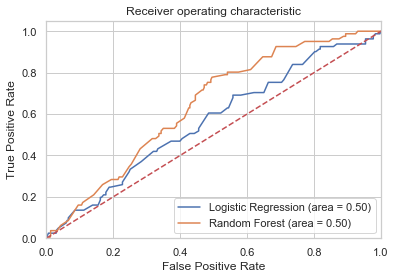

In [40]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
RandomForest_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
# Modeling Scores
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79
Accuracy of Random Forest classifier on test set: 0.77


# Salary Hike best model is Linear Regression with 82% accuracy.

#    

# Predicting Employee Turnover

### Filter employees who left and stayed

In [44]:
#Add a binary column 'left' for modeling the data
# left column value - 1 represents that employee left and 0 - stayed
empTurnover = psql.sqldf("""select 
                    j.*, 
                    (CASE WHEN j.LOS+0.3 = s.LOS THEN 0
                            ELSE 1
                            END) as left
                    from  
                       juneDf j inner join septDf s 
                       on  
                       (j.LOS+0.2 = s.LOS or j.LOS+0.1 = s.LOS or j.LOS+0.3 = s.LOS) and
                       j.salary <= s.salary and j.AGYSUB = s.AGYSUB and j.LOC = s.LOC 
                       and j.AGELVL = s.AGELVL and j.EDLVL = s.EDLVL and j.PATCO = s.PATCO 
                       and j.WORKSTAT = s.WORKSTAT and j.STEMOCC = s.STEMOCC and 
                       j.SUPERVIS =s.SUPERVIS and j.TOA = s.TOA and j.LOSLVL =s.LOSLVL; """)

empTurnover.head(3)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,left
0,AF1Q,40,J,10,13.0,G,1670,2,99,GS-13,...,XXXX,8,10,F,1,202106,1,116715.0,20.2,1
1,AF1Q,40,I,04,12.0,F,1670,2,99,GS-12,...,XXXX,8,10,F,1,202106,1,98155.0,17.6,1
2,AF1Q,40,G,07,12.0,G,2210,2,99,GS-12,...,2210,8,10,F,1,202106,1,95572.0,23.6,1


#### How many left the company 

In [45]:
#Counts of left and stayed
empTurnover['left'].value_counts()  #1 represents that employee left and 0 - stayed

0    1280
1    1008
Name: left, dtype: int64

In [46]:
# Distribution of 'left' column across other numerical variables
empTurnover.groupby('left').mean()

,PATCO,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
left,,,,,,
0,1.944531,1.022656,202106.0,1.0,110173.682813,15.392656
1,1.955357,1.006944,202106.0,1.0,109443.637897,15.318353


#### Employee Turnover frequency by Agency

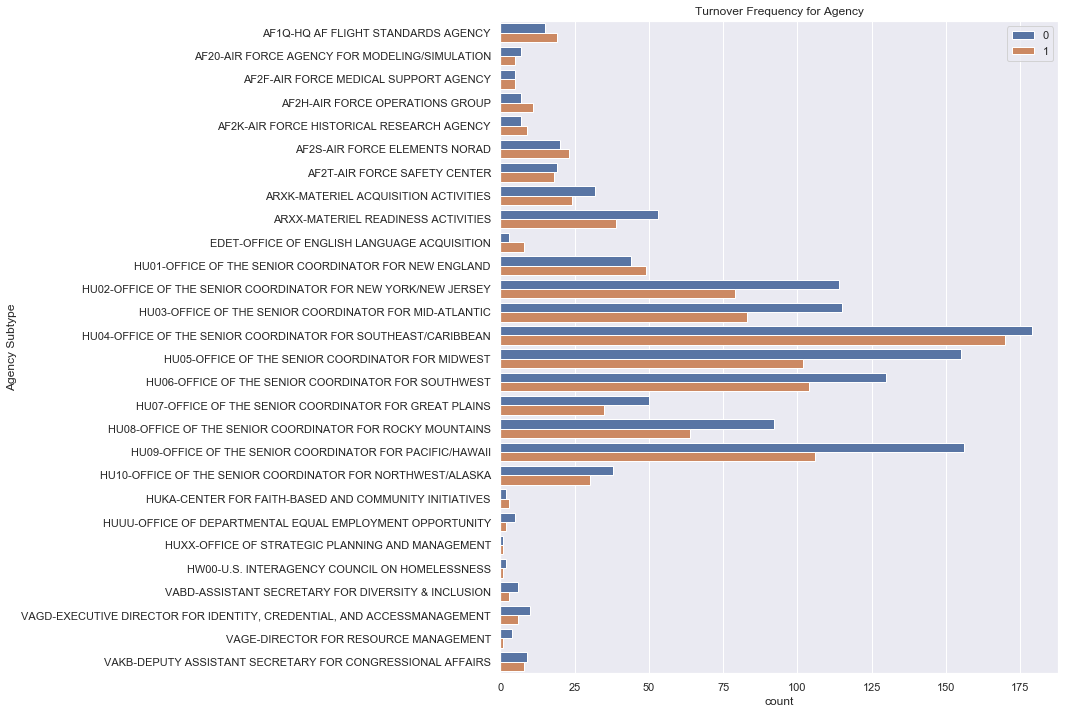

In [286]:
# merging turnover df with agency translation df for the plot
empTurnover1 = pd.merge(empTurnover, agencyt, how='left', on=['AGYSUB'],
left_index=False, right_index=False, sort=True)

# Bar chart for turnover frequency by agency
sns.countplot(y='AGYSUBT',hue='left',data=empTurnover1)
sns.set(rc={'figure.figsize':(10,12)})
plt.ylabel('Agency Subtype')
plt.title('Turnover Frequency for Agency')
plt.legend(loc=1)  # 1 is code for 'upper right'

### Employee Turnover: Histogram of Numeric variables

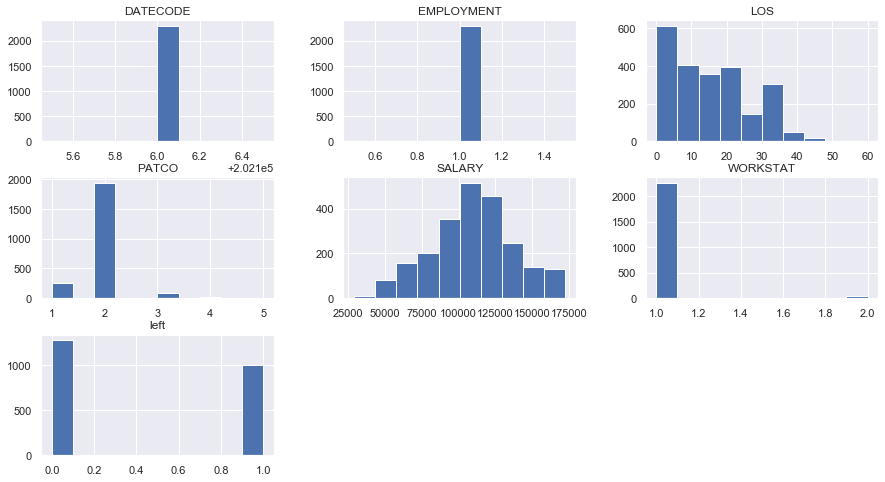

In [287]:
# Distribution of Numeric variables with Histogram
num_bins = 10
empTurnover.hist(bins=num_bins, figsize=(15,8))
plt.savefig("hr_histogram_plots")
plt.show()

## Employee Turnover: ML Modeling

In [47]:
# Defining Predictor and independent variables
# Used for all three models Log Reg, Random Forest and SVM
cols=['SALARY', 'LOS'] 
X=empTurnover[cols]
y=empTurnover['left']

# Splitting input data into train/test  - 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression

Logistic regression accuracy: 0.560
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       385
           1       0.00      0.00      0.00       302

    accuracy                           0.56       687
   macro avg       0.28      0.50      0.36       687
weighted avg       0.31      0.56      0.40       687



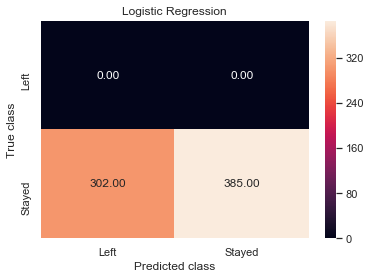

In [48]:
# Fitting the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Accurcay score of Logistic Regression
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

# Classification Report of Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))


# Plot for Log Reg Confusion Matrix
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
lx = sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
bottom, top = lx.get_ylim()
lx.set_ylim(bottom + 0.5, top - 0.5)
plt.rcParams["figure.figsize"] = (8,5.5)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

### Support Vector Machine

Support vector machine accuracy: 0.591
              precision    recall  f1-score   support

           0       0.59      0.87      0.71       385
           1       0.59      0.23      0.33       302

    accuracy                           0.59       687
   macro avg       0.59      0.55      0.52       687
weighted avg       0.59      0.59      0.54       687



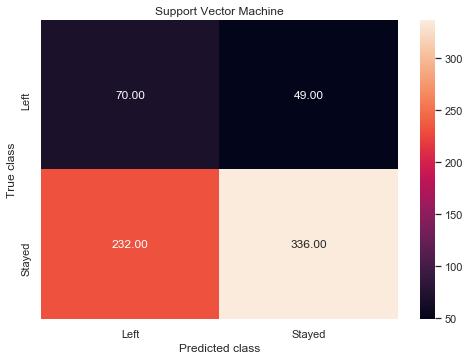

In [49]:
# Fitting the Logistic Regression model
svc = SVC()
svc.fit(X_train, y_train)

# Accurcay score of SVM
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

# Classification Report of SVM
print(classification_report(y_test, svc.predict(X_test)))

# Plot for SVM Confusion Matrix
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
ax = sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

## Random Forest

Random Forest Accuracy: 0.675
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       385
           1       0.65      0.57      0.61       302

    accuracy                           0.68       687
   macro avg       0.67      0.66      0.67       687
weighted avg       0.67      0.68      0.67       687



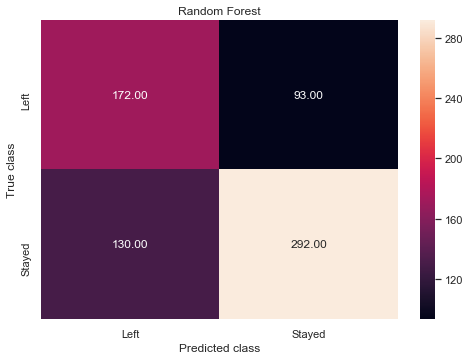

In [50]:
# Fitting the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Accurcay score of Random Forest
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

# Random Forest - Classification Report
print(classification_report(y_test, rf.predict(X_test)))

# Plot for SVM Confusion Matrix
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
rx = sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
bottom, top = rx.get_ylim()
rx.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

## Cross Validation

In [51]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.655


### The ROC Curve

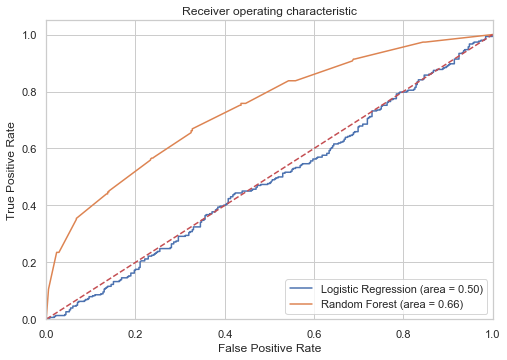

In [52]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

#### Employee Turnover Modeling Scores

In [298]:
# Modeling Scores
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Logistic regression accuracy: 0.560
Support vector machine accuracy: 0.591
Random Forest Accuracy: 0.662


# Empoyee Turnover best model is Random Forest with 68% accuracy.

#     

# Separation Cube Data Analysis

#### Import Separation Cube Data

In [299]:
# Separation Cube data has the information of all the employees who left the company for any reason.
# Separation data we used for analysis is FY2015-2019.

In [53]:
# Import raw data of Separation Cube
separationData = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/Seperation Cude/Sepr_cube/SEPDATA_FY2015-2019.TXT")
separationData.head(3)

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
0,AA00,SA,201703,C,15,13,B,11,0905,1,GS-13,I,40,F,2,1,94796.0,2.5
1,AA00,SA,201806,C,15,13,B,11,0905,1,GS-13,J,30,F,1,1,100203.0,2.0
2,AA00,SC,201710,D,15,12,A,11,0905,1,GS-12,G,30,F,1,1,79720.0,0.6


In [54]:
# The main difference between Employment data and Separation data is the columns
# SEP - A personnel action resulting in the loss of an employee from an agency's staff. 
# For the purposes of FedScope, furloughs, suspensions, leave without pay, 
# and placement in nonpay status for seasonal employees are excluded.
# EFDATE - The date (YYYYMM format) of the personnel action ("Transfer-Outs" and "Separations").

In [55]:
# Translation data for Separation
DTsep = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/Seperation Cude/Sepr_cube/DTsep.txt")
DTsep

,SEP,SEPT
0,SA,Transfer Out - Individual Transfer
1,SB,Transfer Out - Mass Transfer
2,SC,Quit
3,SD,Retirement - Voluntary
4,SE,Retirement - Early Out
5,SF,Retirement - Disability
6,SG,Retirement - Other
7,SH,Reduction In Force (RIF)
8,SJ,Termination (Expired Appt/Other)
9,SK,Death


## Null value computation

In [56]:
# Find null values grouped by agency
dflist2 = separationData.columns
# creating a new column with sum of null values in each row
nullSeparation = separationData.groupby(['AGYSUB'])[dflist2].apply(lambda x: x.isnull().sum())
nullSeparation['results'] = nullSeparation.sum(axis = 1)
#dn.to_csv('dn.csv')


# Finding agencies that has zero missing values
szero = nullSeparation[nullSeparation['results'] == 0]
szero.iloc[: , 1:-1] #trim first and last columns of the dataframe 1=AGYSUB, -1=results
# Fetching only the agencies with zero null values
zero_Null_agy = szero.iloc[:,0]
less_Null_agy = zero_Null_agy.keys().tolist()
#less_na_agy
# verifying the zero null agencies with main data agencies and printing all columns
cleanSeparation = separationData[separationData['AGYSUB'].isin(less_Null_agy)]
cleanSeparation.head(3)

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
22,AB00,SD,201710,J,13,14,I,16,1630,2,GS-14,L,20,F,2,1,125073.0,34.0
23,AB00,SC,201805,E,17,12,E,FR,1016,3,GS-12,G,10,F,1,1,74200.0,14.1
24,AB00,SD,201805,J,17,15,F,51,0301,2,GS-15,P,10,F,1,1,164200.0,17.3


In [57]:
# Adding binary variable 'left' to the Separation data
# Separation, SC - quit
# 1- represents who quit and 0 - left company for all other reasons
cleanSeparation['quit'] = np.where(cleanSeparation['SEP']=='SC', 1, 0)
cleanSeparation.head(2)

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,quit
22,AB00,SD,201710,J,13,14,I,16,1630,2,GS-14,L,20,F,2,1,125073.0,34.0,0
23,AB00,SC,201805,E,17,12,E,FR,1016,3,GS-12,G,10,F,1,1,74200.0,14.1,1


In [58]:
#Counts of Quit and left for any reason
cleanSeparation['quit'].value_counts()

0    708
1    218
Name: quit, dtype: int64

In [59]:
# Distribution of 'quit' column across other numerical variables
cleanSeparation.groupby('quit').mean()

,EFDATE,PATCO,WORKSTAT,COUNT,SALARY,LOS
quit,,,,,,
0,201726.322034,2.024011,1.045198,1.0,100087.555085,19.087712
1,201690.463303,2.311927,1.087156,1.0,81140.178899,6.204128


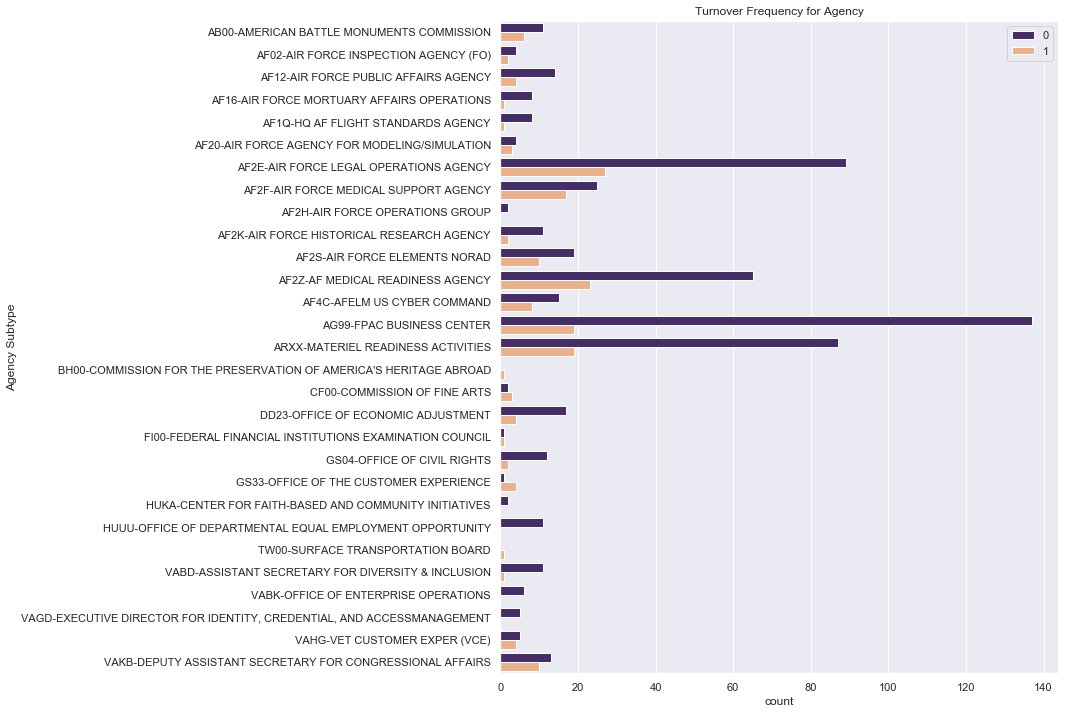

In [309]:
# merging separation df with agency translation df for the plot
cleanSeparation1 = pd.merge(cleanSeparation, agencyt, how='left', on=['AGYSUB'],
left_index=False, right_index=False, sort=True)

sns.countplot(y='AGYSUBT',hue='quit',data=cleanSeparation1, palette=['#432371',"#FAAE7B"])
sns.set(rc={'figure.figsize':(10,50)})
plt.ylabel('Agency Subtype')
plt.title('Turnover Frequency for Agency')
plt.legend(loc=1)  # 1 is code for 'upper right'3
#plt.legend(emp_left11['AGYSUBT'])

#### Histogram of Numeric Variables

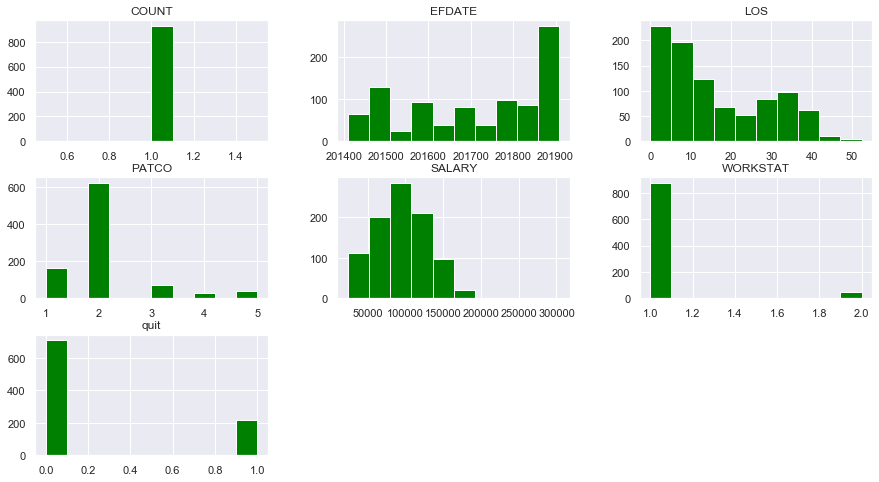

In [313]:
# Distribution of Numeric variables with Histogram
num_bins = 10
cleanSeparation.hist(bins=num_bins, figsize=(15,8), color = "green")
plt.savefig("hr_histogram_plots1")
plt.plot(color = "brown")
plt.show()

## Separation: ML Modeling

In [60]:
# Defining Predictor and independent variables
# Used for all three models Log Reg, Random Forest and SVM
cols1=['TOA','SALARY', 'LOS'] 
X=cleanSeparation[cols1]
y=cleanSeparation['quit']

# Splitting input data into train/test  - 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression

Logistic regression accuracy: 0.742
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       139
           1       0.45      0.11      0.17        47

    accuracy                           0.74       186
   macro avg       0.61      0.53      0.51       186
weighted avg       0.68      0.74      0.68       186



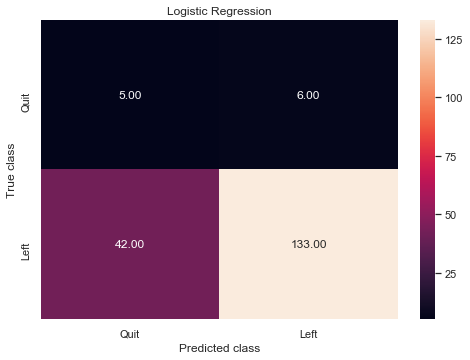

In [61]:
# Fitting the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Accurcay score of Logistic Regression
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

# Classification Report of Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

# Plot for Log Reg Confusion Matrix
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
lx = sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Quit", "Left"] , yticklabels = ["Quit", "Left"] )
bottom, top = lx.get_ylim()
lx.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

## Support Vector Machine

Support vector machine accuracy: 0.753
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       139
           1       0.67      0.04      0.08        47

    accuracy                           0.75       186
   macro avg       0.71      0.52      0.47       186
weighted avg       0.73      0.75      0.66       186



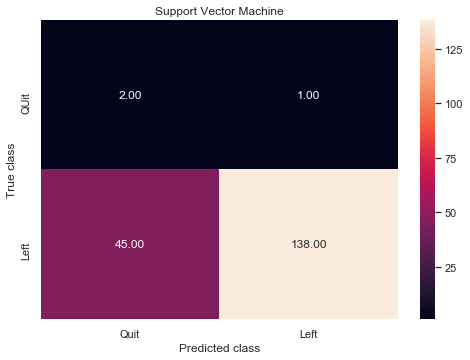

In [62]:
# Fitting the SVM model
svc = SVC()
svc.fit(X_train, y_train)

# Accurcay score of SVM
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

# Classification Report of SVM
print(classification_report(y_test, svc.predict(X_test)))

# Plot for SVM Confusion Matrix
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
ax = sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Quit", "Left"] , yticklabels = ["QUit", "Left"] )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

## Random Forest

Random Forest Accuracy: 0.774
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       139
           1       0.59      0.36      0.45        47

    accuracy                           0.77       186
   macro avg       0.70      0.64      0.65       186
weighted avg       0.75      0.77      0.75       186



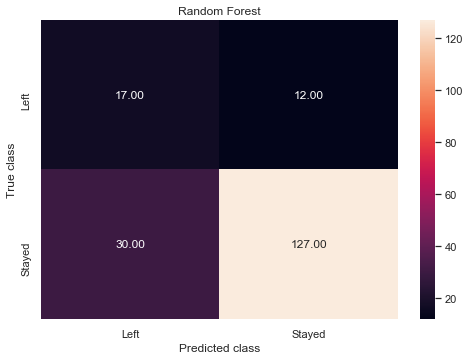

In [63]:
# Fitting the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Accurcay score of Random Forest
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

# Random Forest - Classification Report
print(classification_report(y_test, rf.predict(X_test)))

# Plot for Random Forest Confusion Matrix
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
rx = sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
bottom, top = rx.get_ylim()
rx.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

## Cross Validation

In [320]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.772


## The ROC Curve

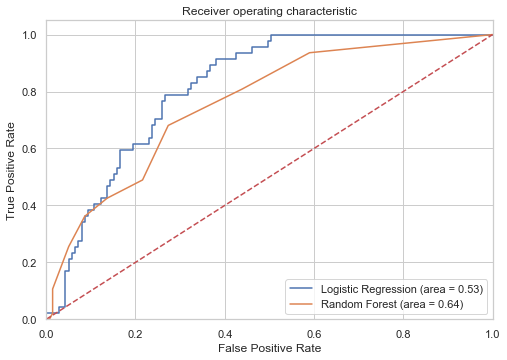

In [64]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [322]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Logistic regression accuracy: 0.742
Support vector machine accuracy: 0.753
Random Forest Accuracy: 0.790
